In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
rng=np.random.RandomState(0)

In [5]:
def make_lineardata(N=50,coef=0,itcp=0):
    x=10*rng.rand(N)
    y=coef*x+itcp+rng.randn(N)
    return x,y

In [6]:
x,y=make_lineardata(200,coef=3,itcp=8)

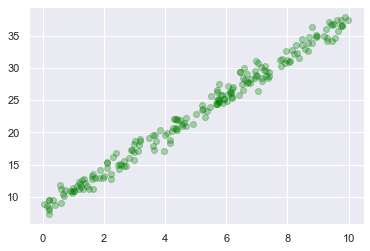

In [7]:
plt.scatter(x,y,color='green',alpha=0.3)

In [8]:
#ahora harremos una prediccion para ciertos datos
x_test=np.linspace(0,10,100)

model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_model=model.predict(x_test[:,np.newaxis])

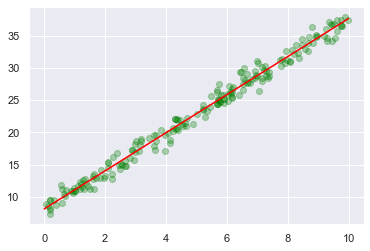

In [10]:
plt.scatter(x,y,color='green',alpha=0.3)
plt.plot(x_test[:,np.newaxis],y_model,color='red')

In [11]:
model.coef_

array([2.9561956])

In [12]:
model.intercept_

8.106941895542764

In [13]:
x=10*rng.rand(100,3)
y=0.5-np.dot(x,[.4,3,10])

model.fit(x,y)
model.intercept_, model.coef_

(0.4999999999999858, array([ -0.4,  -3. , -10. ]))

### Regresion del la funcion Base

#### Funciones de base Polinomica

In [14]:
polynomial=PolynomialFeatures(include_bias=False)

In [15]:
#para manejar datos en las cuales las varibles no tiens relaciones lineales

from sklearn.pipeline import make_pipeline,Pipeline

poly_model=Pipeline([
    ('polynomial',polynomial), 
    ('linear',LinearRegression())

])


In [16]:
x=10*rng.rand(1000)
y=np.sin(x)+0.1*rng.randn(1000)

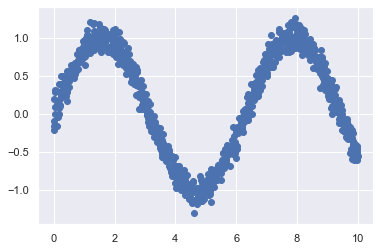

In [17]:
plt.scatter(x,y)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid=GridSearchCV(
    estimator=poly_model,
    param_grid=dict(
            polynomial__degree=list(range(1,20)),
            #polynomial__include_bias=[True,False],
            linear__fit_intercept=[True,False]
    ),
    cv=7
)

In [20]:
grid.fit(x[:,np.newaxis],y);
    

In [21]:
grid.best_params_

{'linear__fit_intercept': False, 'polynomial__degree': 8}

In [22]:
poly_model=make_pipeline(PolynomialFeatures(degree=8),LinearRegression(fit_intercept=True))

In [23]:
poly_model.fit(x[:,np.newaxis],y);

In [24]:
xtest=np.linspace(0,10,1000)
yresult=poly_model.predict(xtest[:,np.newaxis])

(0, 10)

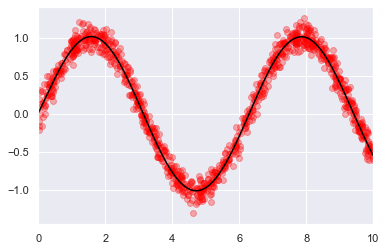

In [25]:
plt.scatter(x,y,color='red',alpha=0.3)
plt.plot(xtest,yresult,color='black')
plt.xlim(0,10)

In [26]:
poly_model.steps[1][1].coef_

array([ 0.00000000e+00,  9.03262713e-01,  1.31939926e-01, -1.99548823e-01,
       -2.88890393e-02,  2.87656903e-02, -5.23169799e-03,  3.84882993e-04,
       -1.02805266e-05])

#### Prediccion de trafico de bicicletas

In [45]:
import pandas as pd

counts=pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)


In [46]:
counts.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


In [55]:
weather=pd.read_csv('BicycleWeather0.csv',index_col='DATE',parse_dates=True)

In [57]:
weather=weather.drop('Unnamed: 0',axis=1)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


Index(['STATION', 'STATION_NAME', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN',
       'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'FMTM', 'WT14', 'WT01', 'WT17',
       'WT05', 'WT02', 'WT22', 'WT04', 'WT13', 'WT16', 'WT08', 'WT18', 'WT03'],
      dtype='object')

In [60]:
daily=counts.resample('1D').sum()

In [61]:
daily['Total']=daily.sum(axis=1)
daily=daily[['Total']]

In [62]:
daily.head()

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0


In [66]:
(daily.index.dayofweek==4).astype(float)

array([0., 0., 1., ..., 0., 0., 0.])

In [68]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i,day in enumerate(days):
    daily[day]=(daily.index.dayofweek==i).astype(float)

In [69]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
